In [87]:
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import gaussian_filter
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask

import seaborn as sns

import matplotlib
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
import types


import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import csv
import pandas as pd
import os

from mpl_toolkits.basemap import Basemap
bm = Basemap()

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [88]:
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (0, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72.0))


def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)

In [89]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [90]:
SPCAM5_heat_15 = np.load("Compressed_Data/Improved_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_moisture_15 = np.load("Compressed_Data/Improved_SPCAM5_15_Min_Interval_Moisture.npy")
SPCAM3_heat_15 = np.load("Compressed_Data/Improved_SPCAM3_15_Min_Interval_Heat.npy")
SPCAM3_moisture_15 = np.load("Compressed_Data/Improved_SPCAM3_15_Min_Interval_Moisture.npy")

SPCAM5_heat_Daily = np.load("Compressed_Data/Improved_Daily_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_moisture_Daily = np.load("Compressed_Data/Improved_Daily_SPCAM5_15_Min_Interval_Moistening.npy")

SPCAM5_Xs = np.load("Compressed_Data/X_Coords.npy")
SPCAM5_pband = np.load("Compressed_Data/Z_Coords.npy")
SPCAM3_Xs = np.load("Compressed_Data/SPCAM3_X_Coords.npy")
SPCAM3_pband = np.load("Compressed_Data/SPCAM3_Z_Coords.npy")

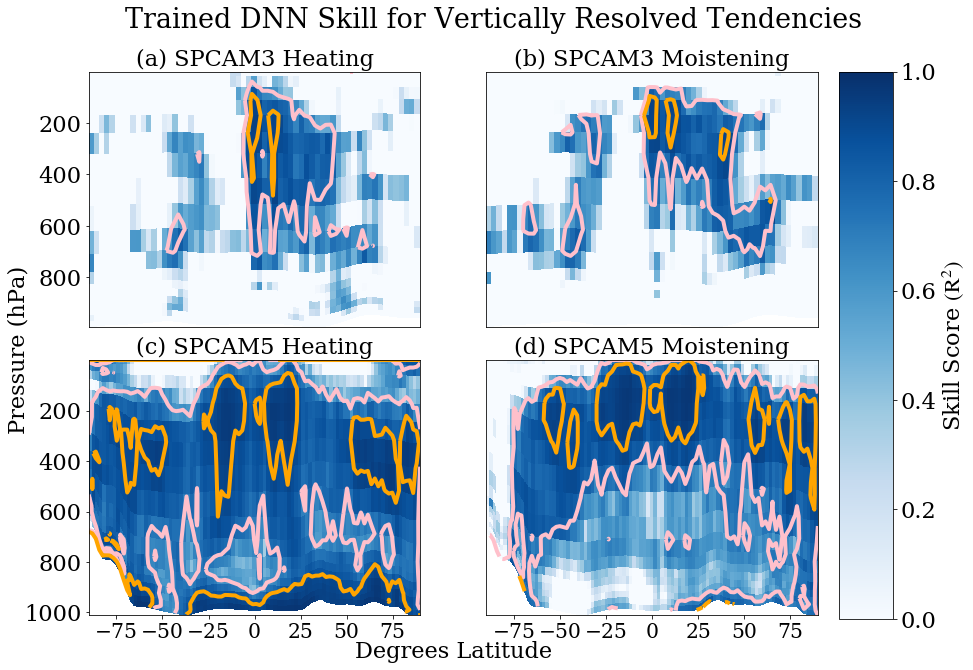

In [91]:

#fig, ax = plt.subplots(2,2, figsize=(15,15))
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].pcolor(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0,0].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0,0].set_title("(a) SPCAM3 Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

ax[0,1].pcolor(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,1].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  [0.7], colors='pink', linewidths=[4])
ax[0,1].contour(SPCAM3_Xs, SPCAM3_pband, SPCAM3_moisture_15,  [0.9], colors='orange', linewidths=[4])
ax[0,1].set_title("(b) SPCAM3 Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.38,-0.09)

ax[1,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[1,0].set_title("(c) SPCAM5 Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

contour_plot = ax[1,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.7], colors='pink', linewidths=[4])
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.9], colors='orange', linewidths=[4])
ax[1,1].set_title("(d) SPCAM5 Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("Trained DNN Skill for Vertically Resolved Tendencies", y = 0.97)
plt.subplots_adjust(hspace=0.13)
print(" ")

plt.savefig("Figures/Figure1.png")
plt.savefig("Figures/Figure1.pdf")

In [92]:
z = 30

SPCAM3_heat_15[SPCAM3_heat_15 < 0.0] = 0.0
SPCAM3_heat_15[SPCAM3_heat_15 > 1.0] = 1.0

SPCAM3_moisture_15[SPCAM3_moisture_15 < 0.0] = 0.0
SPCAM3_moisture_15[SPCAM3_moisture_15 > 1.0] = 1.0

SPCAM5_heat_15[SPCAM5_heat_15 < 0.0] = 0.0
SPCAM5_heat_15[SPCAM5_heat_15 > 1.0] = 1.0

SPCAM5_moisture_15[SPCAM5_moisture_15 < 0.0] = 0.0
SPCAM5_moisture_15[SPCAM5_moisture_15 > 1.0] = 1.0

SPCAM3_Heating = np.nanmean(SPCAM3_heat_15, axis = 0)
SPCAM3_Moistening = np.nanmean(SPCAM3_moisture_15, axis = 0)
SPCAM5_Heating = np.nanmean(SPCAM5_heat_15, axis=0)
SPCAM5_Moistening = np.nanmean(SPCAM5_moisture_15, axis=0)
#SPCAM3 
print("SPCAM3 Heat Global 25th Percentile is",np.percentile(SPCAM3_heat_15,25))
print("SPCAM3 Heat Global 50th Percentile is",np.percentile(SPCAM3_heat_15,50))
print("SPCAM3 Heat Global 75th Percentile is",np.percentile(SPCAM3_heat_15,75))

print("SPCAM3 Moist Global 25th Percentile is",np.percentile(SPCAM3_moisture_15 ,25))
print("SPCAM3 Moist Global 50th Percentile is",np.percentile(SPCAM3_moisture_15 ,50))
print("SPCAM3 Moist Global 75th Percentile is",np.percentile(SPCAM3_moisture_15 ,75))

others = netCDF4.Dataset("Compressed_Data/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0001-12-31-00000.nc")
lon_list = np.array(others.variables['lon'])
lat_list = np.array(others.variables['lat'])

print("SPCAM5 Heat Global 25th Percentile is",np.percentile(SPCAM5_heat_15,25))
print("SPCAM5 Heat Global 50th Percentile is",np.percentile(SPCAM5_heat_15,50))
print("SPCAM5 Heat Global 75th Percentile is",np.percentile(SPCAM5_heat_15,75))

print("SPCAM5 Moist Global 25th Percentile is",np.percentile(SPCAM5_moisture_15 ,25))
print("SPCAM5 Moist Global 50th Percentile is",np.percentile(SPCAM5_moisture_15 ,50))
print("SPCAM5 Moist Global 75th Percentile is",np.percentile(SPCAM5_moisture_15 ,75))

SPCAM3 Heat Global 25th Percentile is 0.0
SPCAM3 Heat Global 50th Percentile is 0.0
SPCAM3 Heat Global 75th Percentile is 0.0
SPCAM3 Moist Global 25th Percentile is 0.0
SPCAM3 Moist Global 50th Percentile is 0.0
SPCAM3 Moist Global 75th Percentile is 0.0
SPCAM5 Heat Global 25th Percentile is 0.5872612778982831
SPCAM5 Heat Global 50th Percentile is 0.8015779864514183
SPCAM5 Heat Global 75th Percentile is 0.8983998860564562
SPCAM5 Moist Global 25th Percentile is 0.0
SPCAM5 Moist Global 50th Percentile is 0.2406140877917013
SPCAM5 Moist Global 75th Percentile is 0.7248191734084013


In [93]:
No_SHERPA_SPCAM5_heat_15 = np.load("Compressed_Data/Improved_NO_SHERPA_SPCAM5_15_Min_Interval_Heat.npy")
No_SHERPA_SPCAM5_moist_15 = np.load("Compressed_Data/Improved_NO_SHERPA_SPCAM5_15_Min_Interval_Moisture.npy")

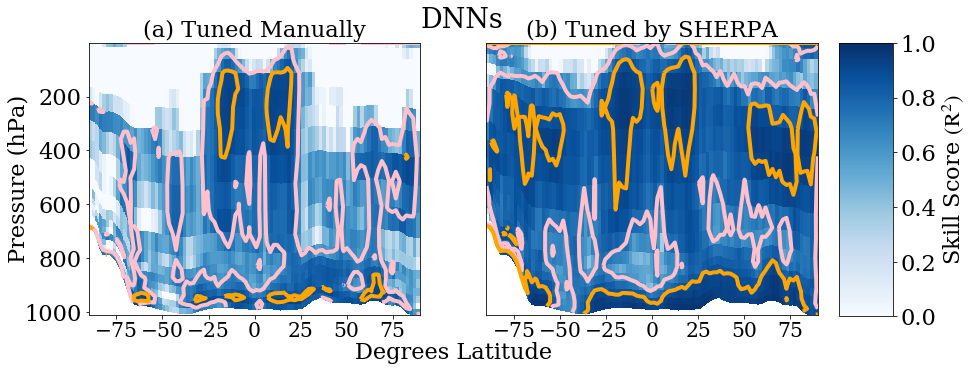

In [94]:
#fig, ax = plt.subplots(1,2, figsize=(15,7))
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].pcolor(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0].contour(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0].contour(SPCAM5_Xs, SPCAM5_pband, No_SHERPA_SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0].set_title("(a) Tuned Manually", fontsize = fz)
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_xlabel("Degrees Latitude")
ax[0].xaxis.set_label_coords(1.1,-0.10)
ax[0].locator_params(nbins=8)
ax[0].tick_params(axis='x', labelsize=fz*0.9)

ax[1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[1].set_title("(b) Tuned by SHERPA", fontsize = fz)
ax[1].set_yticks([])
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_ylabel("Pressure (hPa)")
ax[1].yaxis.set_label_coords(-1.38,0.5)
ax[1].locator_params(nbins=8)
ax[1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("DNNs", x=0.47)

plt.savefig("Figures/Figure2.png")
plt.savefig("Figures/Figure2.pdf")

In [95]:
No_SHERPA_SPCAM5_heat_15[No_SHERPA_SPCAM5_heat_15 < 0.0] = 0.0
No_SHERPA_SPCAM5_heat_15[No_SHERPA_SPCAM5_heat_15 > 1.0] = 1.0
No_SHERPA_SPCAM5_moist_15[No_SHERPA_SPCAM5_moist_15 < 0.0] = 0.0
No_SHERPA_SPCAM5_moist_15[No_SHERPA_SPCAM5_moist_15 > 1.0] = 1.0

print("SPCAM5 Heat Global 25th Percentile is",np.percentile(No_SHERPA_SPCAM5_heat_15,25))
print("SPCAM5 Heat Global 50th Percentile is",np.percentile(No_SHERPA_SPCAM5_heat_15,50))
print("SPCAM5 Heat Global 75th Percentile is",np.percentile(No_SHERPA_SPCAM5_heat_15,75))

print("SPCAM5 Moisture Global 25th Percentile is",np.percentile(No_SHERPA_SPCAM5_moist_15,25))
print("SPCAM5 Moisture Global 50th Percentile is",np.percentile(No_SHERPA_SPCAM5_moist_15,50))
print("SPCAM5 Moisture Global 75th Percentile is",np.percentile(No_SHERPA_SPCAM5_moist_15,75))

SPCAM5 Heat Global 25th Percentile is 0.0
SPCAM5 Heat Global 50th Percentile is 0.3325290785312714
SPCAM5 Heat Global 75th Percentile is 0.7012052401032118
SPCAM5 Moisture Global 25th Percentile is 0.0
SPCAM5 Moisture Global 50th Percentile is 0.0
SPCAM5 Moisture Global 75th Percentile is 0.25645565268407744


In [96]:
others = netCDF4.Dataset("Compressed_Data/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
Xvar, Yvar = np.meshgrid(lons, lats)

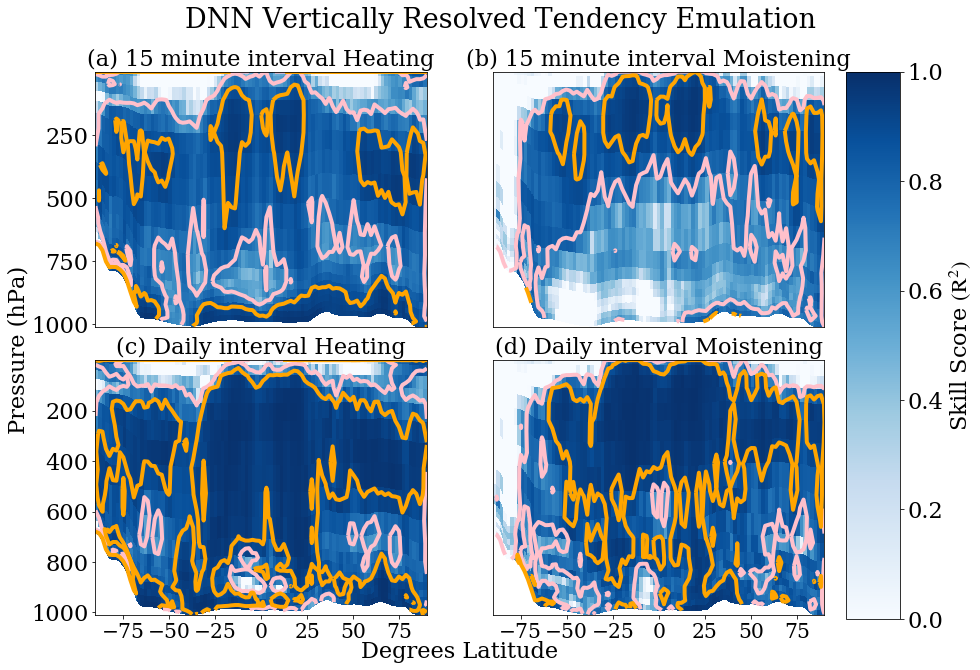

In [97]:
#fig, ax = plt.subplots(2,2, figsize=(15,15))
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.7], colors='pink', linewidths=[4])
ax[0,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_15, [0.9], colors='orange', linewidths=[4])
ax[0,0].set_title("(a) 15 minute interval Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

ax[0,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[0,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.7], colors='pink', linewidths=[4])
ax[0,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_15, [0.9], colors='orange', linewidths=[4])
ax[0,1].set_title("(b) 15 minute interval Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.40,-0.09)

ax[1,0].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, [0.7], colors='pink', linewidths=[4])
ax[1,0].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_heat_Daily, [0.9], colors='orange', linewidths=[4])
ax[1,0].set_title("(c) Daily interval Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

contour_plot = ax[1,1].pcolor(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, cmap = 'Blues', vmin = 0, vmax = 1.0)
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, [0.7], colors='pink', linewidths=[4])
ax[1,1].contour(SPCAM5_Xs, SPCAM5_pband, SPCAM5_moisture_Daily, [0.9], colors='orange', linewidths=[4])
ax[1,1].set_title("(d) Daily interval Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
plt.suptitle("DNN Vertically Resolved Tendency Emulation", y=0.97)
plt.subplots_adjust(hspace=0.13)
print(" ")

plt.savefig("Figures/Figure4.png")
plt.savefig("Figures/Figure4.pdf")

In [98]:
SPCAM5_heat_15 = np.load("Compressed_Data/15_Min_Interval_Heat.npy")

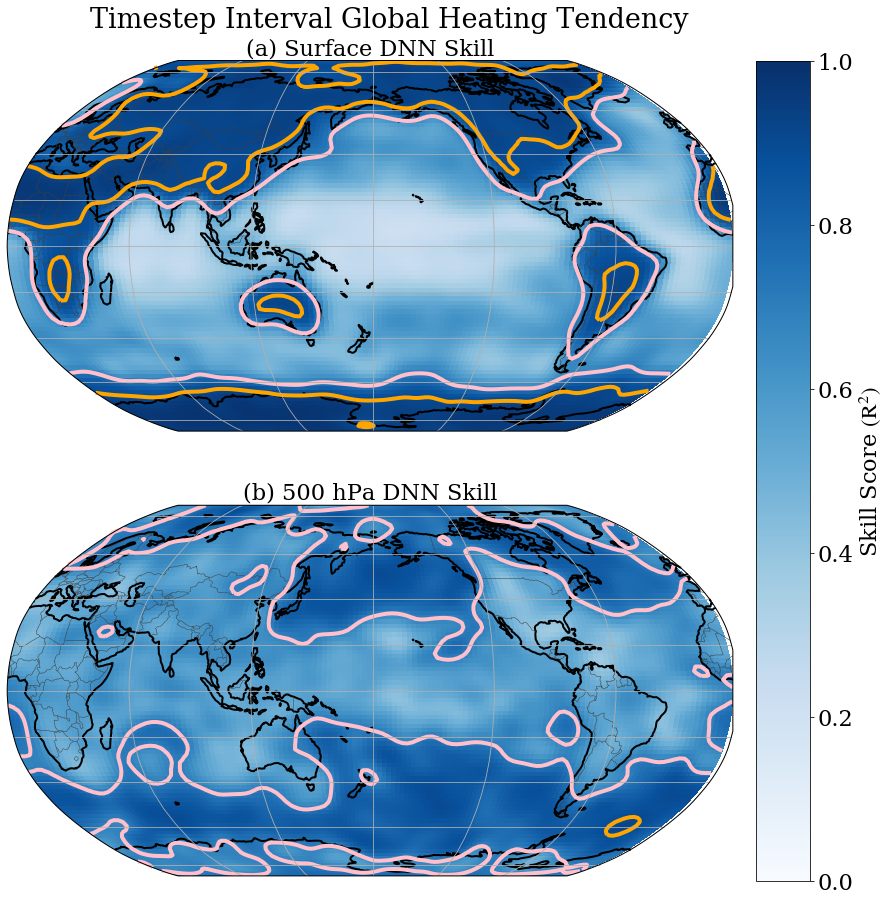

In [99]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)

#SPCAM5_lat_lon_new = gaussian_filter(SPCAM5_lat_lon, 2, mode='nearest')
SPCAM5_lat_lon_new = gaussian_filter(np.squeeze(SPCAM5_heat_15[:,:,-1]), 2, mode='nearest')
contour_plot = ax[0].pcolormesh(Xvar, Yvar, SPCAM5_lat_lon_new.T,cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, SPCAM5_lat_lon_new.T, [0.7], colors='pink', linewidths=[4], transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, SPCAM5_lat_lon_new.T, [0.9], colors='orange', linewidths=[4], transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
fig.colorbar(contour_plot, label="Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', cax=cbar_ax)
#plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[0])
ax[0].set_title('(a) Surface DNN Skill', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

#SPCAM5_500_new = gaussian_filter(SPCAM5_500, 2, mode='nearest')
SPCAM5_500_new = gaussian_filter(np.squeeze(SPCAM5_heat_15[:,:,-12]), 2, mode='nearest')
contour_plot = ax[1].pcolormesh(Xvar, Yvar, SPCAM5_500_new.T,cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, SPCAM5_500_new.T, [0.7], colors='pink', linewidths=[4], transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, SPCAM5_500_new.T, [0.9], colors='orange', linewidths=[4], transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[1])
ax[1].set_title('(b) 500 hPa DNN Skill', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.suptitle("Timestep Interval Global Heating Tendency", y=0.93, x=0.48)

plt.savefig("Figures/Figure3.png")
plt.savefig("Figures/Figure3.pdf")

In [100]:
Moisture_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Moistening.npy")
Moisture_Spectra_Predict = np.load("Compressed_Data/Weighted_Basic_Spectral_Prediction_Moistening.npy")
Heat_Spectra_Predict = np.load("Compressed_Data/Weighted_Basic_Spectral_Prediction_Heat.npy")
Heat_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Heat.npy")
SPCAM5_freqs = np.load('Compressed_Data/Basic_Spectral_Frequencies.npy')
CAM_Heat_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Heat.npy')
CAM_Moisture_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Moisture.npy')
CAM_Freqs_Spectra = np.load('Compressed_Data/CAM_Spectra_freqs_Moisture.npy')

Ocean_Moisture_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Moisture_Ocean.npy")
Ocean_Moisture_Spectra_Predict = np.load("Compressed_Data/Weighted_Basic_Spectral_Prediction_Moisture_Ocean.npy")
Ocean_Heat_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Heat_Ocean.npy")
Ocean_CAM_Heat_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Heat_Ocean.npy')
Ocean_CAM_Moisture_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Moisture_Ocean.npy')

Land_Moisture_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Moisture_Land.npy")
Land_Moisture_Spectra_Predict = np.load("Compressed_Data/Weighted_Basic_Spectral_Prediction_Moisture_Land.npy")
Land_Heat_Spectra_Predict = np.load("Compressed_Data/Weighted_Basic_Spectral_Prediction_Heat_Land.npy")
Land_Heat_Spectra_True = np.load("Compressed_Data/Weighted_Basic_Spectral_Truth_Heat_Land.npy")
Land_CAM_Heat_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Heat_Land.npy')
Land_CAM_Moisture_Spectra = np.load('Compressed_Data/Weighted_CAM_Spectra_Moisture_Land.npy')

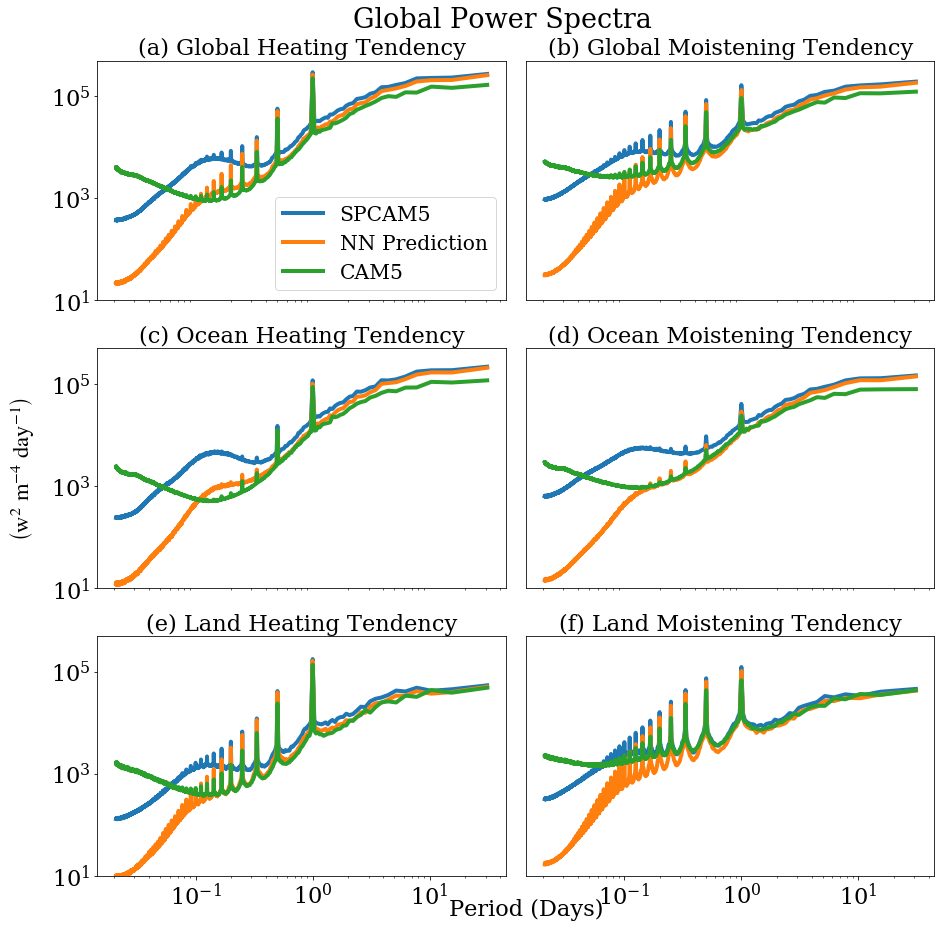

In [101]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].plot(1/SPCAM5_freqs, Heat_Spectra_True, label = "SPCAM5")
ax[0,0].plot(1/SPCAM5_freqs, Heat_Spectra_Predict, label = "NN Prediction")
ax[0,0].plot(1/CAM_Freqs_Spectra[:-1], CAM_Heat_Spectra[:-1], label = "CAM5")
ax[0,0].set_title("(a) Global Heating Tendency", fontsize = fz)
ax[2,0].set_xlabel("Period (Days)")
ax[2,0].xaxis.set_label_coords(1.05,-0.095)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].legend(prop={'size': fz*0.9})
ax[0,0].set_xticks([])
#ax[0,0].set_ylim(1e-11, 1e-5)

ax[0,1].plot(1/SPCAM5_freqs, Moisture_Spectra_True, label = "SPCAM5")
ax[0,1].plot(1/SPCAM5_freqs, Moisture_Spectra_Predict, label = "NN Prediction")
ax[0,1].plot(1/CAM_Freqs_Spectra[:-1], CAM_Moisture_Spectra[:-1], label = "CAM5")
ax[0,1].set_title("(b) Global Moistening Tendency", fontsize = fz)
ax[1,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-4} \ day^{-1}}\right)$')
ax[0,1].yaxis.set_label_coords(-1.20,0.5)
ax[0,1].set_xscale("log")
ax[0,1].set_yscale("log")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
#ax[0,1].set_ylim(1e-17, 1e-12)

ax[1,0].plot(1/SPCAM5_freqs, Ocean_Heat_Spectra_True)
ax[1,0].plot(1/SPCAM5_freqs, Ocean_Heat_Spectra_Predict)
ax[1,0].plot(1/CAM_Freqs_Spectra[:-1], Ocean_CAM_Heat_Spectra[:-1])
ax[1,0].set_title("(c) Ocean Heating Tendency", fontsize = fz)
#ax[0,0].set_xlabel("Period (Days)")
#ax[0,0].xaxis.set_label_coords(1.05,-0.095)
ax[1,0].set_xscale("log")
ax[1,0].set_yscale("log")
#ax[0,0].legend(prop={'size': fz*0.9})
ax[1,0].set_xticks([])
#ax[1,0].set_ylim(1e-11, 1e-5)

ax[1,1].plot(1/SPCAM5_freqs, Ocean_Moisture_Spectra_True)
ax[1,1].plot(1/SPCAM5_freqs, Ocean_Moisture_Spectra_Predict)
ax[1,1].plot(1/CAM_Freqs_Spectra[:-1], Ocean_CAM_Moisture_Spectra[:-1])
ax[1,1].set_title("(d) Ocean Moistening Tendency", fontsize = fz)
#ax[0,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-2} \ day^{-1}}\right)$')
ax[1,1].yaxis.set_label_coords(-1.20,0.5)
ax[1,1].set_xscale("log")
ax[1,1].set_yscale("log")
ax[1,1].yaxis.tick_right()
ax[1,1].set_xticks([])
#ax[1,1].set_ylim(1e-17, 1e-12)

ax[2,0].plot(1/SPCAM5_freqs, Land_Heat_Spectra_True)
ax[2,0].plot(1/SPCAM5_freqs, Land_Heat_Spectra_Predict)
ax[2,0].plot(1/CAM_Freqs_Spectra[:-1], Land_CAM_Heat_Spectra[:-1])
ax[2,0].set_title("(e) Land Heating Tendency", fontsize = fz)
#ax[0,0].set_xlabel("Period (Days)")
#ax[0,0].xaxis.set_label_coords(1.05,-0.095)
ax[2,0].set_xscale("log")
ax[2,0].set_yscale("log")
#ax[0,0].legend(prop={'size': fz*0.9})
#ax[2,0].set_ylim(1e-11, 1e-5)

ax[2,1].plot(1/SPCAM5_freqs, Land_Moisture_Spectra_True)
ax[2,1].plot(1/SPCAM5_freqs, Land_Moisture_Spectra_Predict)
ax[2,1].plot(1/CAM_Freqs_Spectra[:-1], Land_CAM_Moisture_Spectra[:-1])
ax[2,1].set_title("(f) Land Moistening Tendency", fontsize = fz)
#ax[0,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-2} \ day^{-1}}\right)$')
ax[2,1].yaxis.set_label_coords(-1.20,0.5)
ax[2,1].set_xscale("log")
ax[2,1].set_yscale("log")
ax[2,1].yaxis.tick_right()
#ax[2,1].set_ylim(1e-17, 1e-12)

ymin=1e1
ymax=5e5
ax[0,0].set_ylim(ymin, ymax)
ax[0,1].set_ylim(ymin, ymax)
ax[1,0].set_ylim(ymin, ymax)
ax[1,1].set_ylim(ymin, ymax)
ax[2,0].set_ylim(ymin, ymax)
ax[2,1].set_ylim(ymin, ymax)

ax[0,1].set_yticks([])
ax[1,1].set_yticks([])
ax[2,1].set_yticks([])

plt.suptitle("Global Power Spectra", y=0.93)
plt.subplots_adjust(wspace=0.05)

plt.savefig("Figures/Figure5.png")
plt.savefig("Figures/Figure5.pdf")

In [102]:
Autocorr_latlon_freq = np.load("Compressed_Data/Autocorr_SFC_Frequency.npy")
April_SPCAM5_lat_lon = np.load("Compressed_Data/April_SPCAM5_15_Min_Interval_Heat.npy")
SPCAM5_lat_lon = April_SPCAM5_lat_lon[:,:,-1]
R2_Bottom_10 = np.percentile(SPCAM5_lat_lon, 10)
Autocorr_Top_10 = np.percentile(Autocorr_latlon_freq, 90)

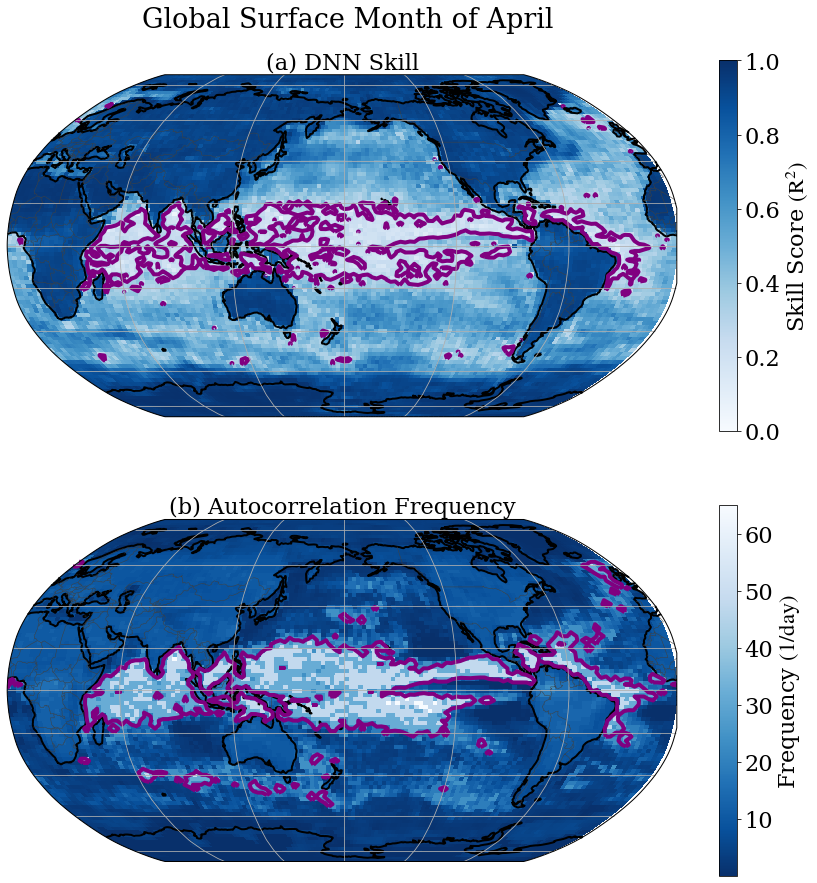

In [103]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
contour_plot = ax[0].pcolormesh(Xvar, Yvar, np.squeeze(SPCAM5_heat_15[:,:,-1].T),cmap='Blues', vmin = 0, vmax = 1.0, transform=ccrs.PlateCarree())
ax[0].contour(Xvar, Yvar, np.squeeze(SPCAM5_heat_15[:,:,-1].T), [R2_Bottom_10], colors='purple', linewidths=[4], transform=ccrs.PlateCarree())
plt.colorbar(contour_plot, label = "Skill Score "+r'$\left(\mathrm{R^{2}}\right)$', ax=ax[0])
ax[0].set_title('(a) DNN Skill', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax[1].pcolormesh(Xvar, Yvar, Autocorr_latlon_freq,cmap='Blues_r', vmax = 65, transform=ccrs.PlateCarree())
ax[1].contour(Xvar, Yvar, Autocorr_latlon_freq, [Autocorr_Top_10], colors='purple', linewidths=[4], transform=ccrs.PlateCarree())
plt.colorbar(contour_plot, label = "Frequency "+r'$\left(\mathrm{1 / day}\right)$', ax=ax[1])
ax[1].set_title('(b) Autocorrelation Frequency', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

plt.suptitle("Global Surface Month of April", y=0.93, x=0.44)

plt.savefig("Figures/Figure6.png")
plt.savefig("Figures/Figure6.pdf")

In [104]:
def stats_gen(datas):
    q1 = []
    median = []
    q3 = []
    for i in range(len(datas[0][0])):
        temp = np.squeeze(datas[:,:,i])
        temp = temp.ravel()
        q1.append(np.nanpercentile(temp, 25))
        median.append(np.nanpercentile(temp, 50))
        q3.append(np.nanpercentile(temp, 75))
    
    q1 = np.array(q1)
    median = np.array(median)
    q3 = np.array(q3)
    
    return q1/np.max(median), median/np.max(median), q3/np.max(median)

def Sig_Test(point_b):
    tcoor = np.arange(0, len(point_b), 1)/96
    it = np.argwhere(np.diff(np.sign(point_b/point_b[0]-np.exp(-1))))[0]
    tau = tcoor[it]
    return tau[0]

def e_time_getter(data_array):
    e_times = np.zeros(shape = (x, y))
    e_times[:,:] = np.nan
    for i in range(len(data_array)):
        for j in range(len(data_array[i])):
            temp = np.squeeze(data_array[i,j,:])
            value =  Sig_Test(temp)
            e_times[i,j] = value
            
    e_data = e_times.ravel()
    filtered_data = e_data[~np.isnan(e_data)]
    return filtered_data

In [105]:
Autocorr_Tropical_All = np.load("Compressed_Data/Autocorr_Tropical_All.npy")
Autocorr_Tropical_Good = np.load("Compressed_Data/Autocorr_Tropical_good.npy")
Autocorr_Tropical_Bad = np.load("Compressed_Data/Autocorr_Tropical_bad.npy")
Autocorr_Midlat_All = np.load("Compressed_Data/Autocorr_Midlat_All.npy")
Autocorr_Midlat_Good = np.load("Compressed_Data/Autocorr_Midlat_good.npy")
Autocorr_Midlat_Bad = np.load("Compressed_Data/Autocorr_Midlat_bad.npy")

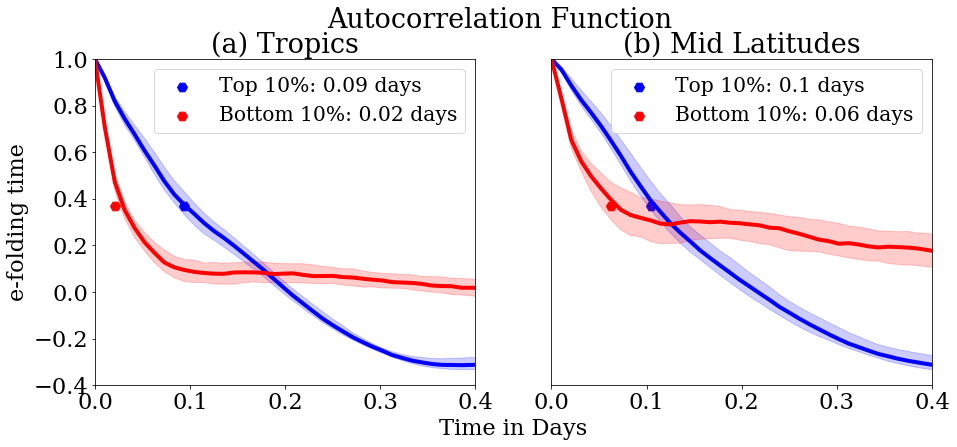

In [106]:
#fig, ax = plt.subplots(1,2,figsize=(15,10))
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].set_title("(a) Tropics")
ax[0].set_xlabel('Time in Days', fontsize = fz)
ax[0].xaxis.set_label_coords(1.1,-0.10)
#good tropics
q1, median, q3 = stats_gen(Autocorr_Tropical_Good)
tcoor = np.arange(0, len(median), 1)/96
y = ax[0].plot(tcoor, median, color = "b")
ax[0].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "b")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[0].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "b", label="Top 10%"+": "+str(round(tau[0],2))+' days')
#bad tropics
q1, median, q3 = stats_gen(Autocorr_Tropical_Bad)
tcoor = np.arange(0, len(median), 1)/96
y = ax[0].plot(tcoor, median, color = "r")
ax[0].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "r")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[0].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "r", label="Bottom 10%"+": "+str(round(tau[0],2))+' days')
ax[0].legend(prop={'size': fz*0.9})
ax[0].set_ylabel("e-folding time")
ax[0].set_xlim(0,0.40)
ax[0].set_ylim(-0.4, 1)

ax[1].set_title("(b) Mid Latitudes")
ax[1].set_yticks([])

#good mid lats
q1, median, q3 = stats_gen(Autocorr_Midlat_Good)
tcoor = np.arange(0, len(median), 1)/96
y = ax[1].plot(tcoor, median, color = "b")
ax[1].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "b")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[1].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "b", label="Top 10%"+": "+str(round(tau[0],2))+' days')

#bad midlats
q1, median, q3 = stats_gen(Autocorr_Midlat_Bad)
tcoor = np.arange(0, len(median), 1)/96
y = ax[1].plot(tcoor, median, color = "r")
ax[1].fill_between(tcoor, q1,  q3, alpha = 0.2, color = "r")
it = np.argwhere(np.diff(np.sign(median/median[0]-np.exp(-1))))[0]
tau = tcoor[it]
ax[1].scatter(tau, np.exp(-1)*median[0], s=100, marker = 'H', color = "r", label="Bottom 10%"+": "+str(round(tau[0],2))+' days')

ax[1].legend(prop={'size': fz*0.9})
ax[1].set_xlim(0,0.40) 
ax[1].set_ylim(-0.4, 1)
plt.suptitle("Autocorrelation Function", y=1.0)
plt.savefig("Figures/Figure7.png")
plt.savefig("Figures/Figure7.pdf")

In [107]:
CAM_Cycle = np.load("Compressed_Data/Summer_Precip_Cycle_CAM.npy")
SPCAM_Cycle = np.load("Compressed_Data/Summer_Precip_Cycle_Truth.npy")
NN_Cycle = np.load("Compressed_Data/Summer_Precip_Cycle_Prediction.npy")

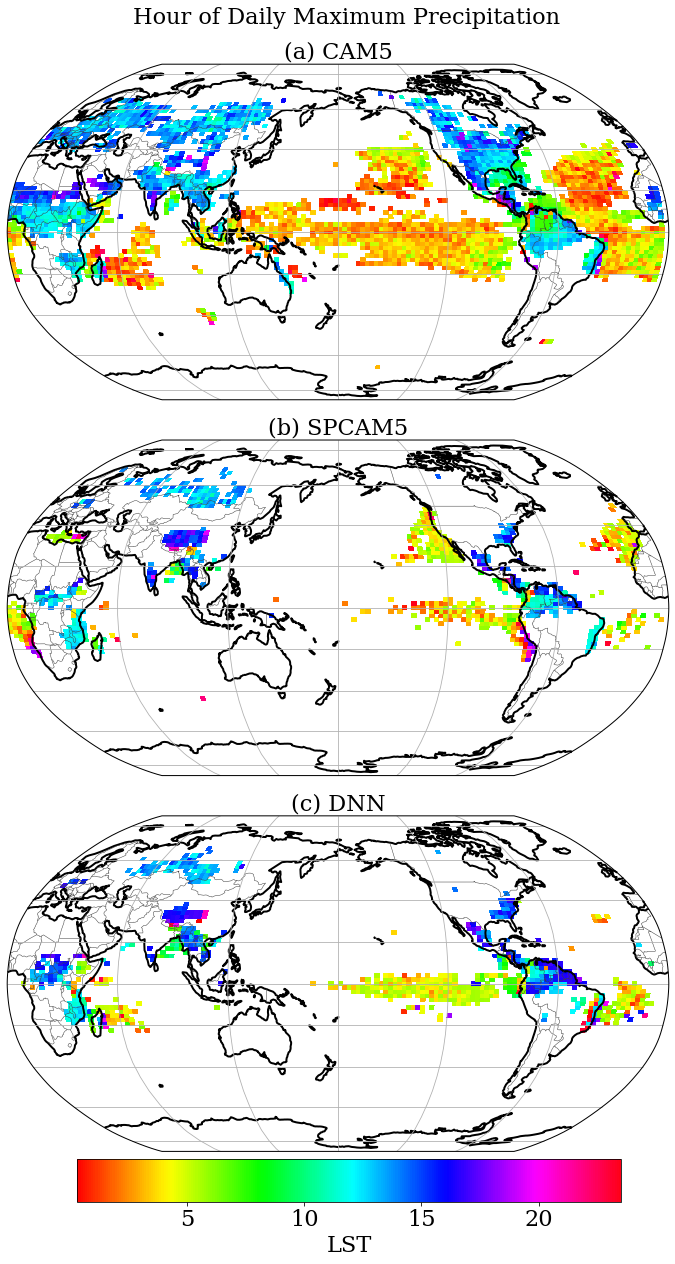

In [108]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,20)

contour_plot = ax[0].pcolormesh(Xvar, Yvar, CAM_Cycle, cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[0])
ax[0].set_title('(a) CAM5', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()
ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax[1].pcolormesh(Xvar, Yvar, SPCAM_Cycle,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax[1].set_title('(b) SPCAM5', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax[2].pcolormesh(Xvar, Yvar, NN_Cycle,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax[2].set_title('(c) DNN', fontsize = fz)
ax[2].coastlines(linewidth=2.0,edgecolor='0.25')
ax[2].gridlines()
ax[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.30, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)

plt.savefig("Figures/Figure8.png")
plt.savefig("Figures/Figure8.pdf")

In [109]:
maxi = np.load("Compressed_Data/Precip_Min_Scalar.npy")
mini = np.load("Compressed_Data/Precip_Max_Scalar.npy")
cams = np.load("Compressed_Data/CAM5_PRECIP.npy")
targ = np.load("Compressed_Data/SPCAM5_Prepip_Truth.npy")
feat = np.load("Compressed_Data/SPCAM5_Precip_Prediction.npy")
bad_feat = np.load("Compressed_Data/Bad_SPCAM5_Precip_Prediction.npy")

ocean_maxi = np.load("Compressed_Data/Ocean_Precip_Min_Scalar.npy")
ocean_mini = np.load("Compressed_Data/Ocean_Precip_Max_Scalar.npy")
ocean_cams = np.load("Compressed_Data/Ocean_CAM5_PRECIP.npy")
ocean_targ = np.load("Compressed_Data/Ocean_SPCAM5_Prepip_Truth.npy")
ocean_feat = np.load("Compressed_Data/Ocean_SPCAM5_Precip_Prediction.npy")
bad_ocean_feat = np.load("Compressed_Data/Bad_Ocean_SPCAM5_Precip_Prediction.npy")

land_maxi = np.load("Compressed_Data/Land_Precip_Min_Scalar.npy")
land_mini = np.load("Compressed_Data/Land_Precip_Max_Scalar.npy")
land_cams = np.load("Compressed_Data/Land_CAM5_PRECIP.npy")
land_targ = np.load("Compressed_Data/Land_SPCAM5_Prepip_Truth.npy")
land_feat = np.load("Compressed_Data/Land_SPCAM5_Precip_Prediction.npy")
bad_land_feat = np.load("Compressed_Data/Bad_Land_SPCAM5_Precip_Prediction.npy")

In [110]:
def array_generator(min_val, max_val, percentage):
    listing = []
    for i in range(300):
        if i == 0:
            temp_val = min_val
            listing.append(temp_val)
        else:
            if temp_val < max_val:
                temp_val = temp_val*percentage
                listing.append(temp_val)
        
    return np.array(listing)
#array_generator(0.03, maxi, 1.07)

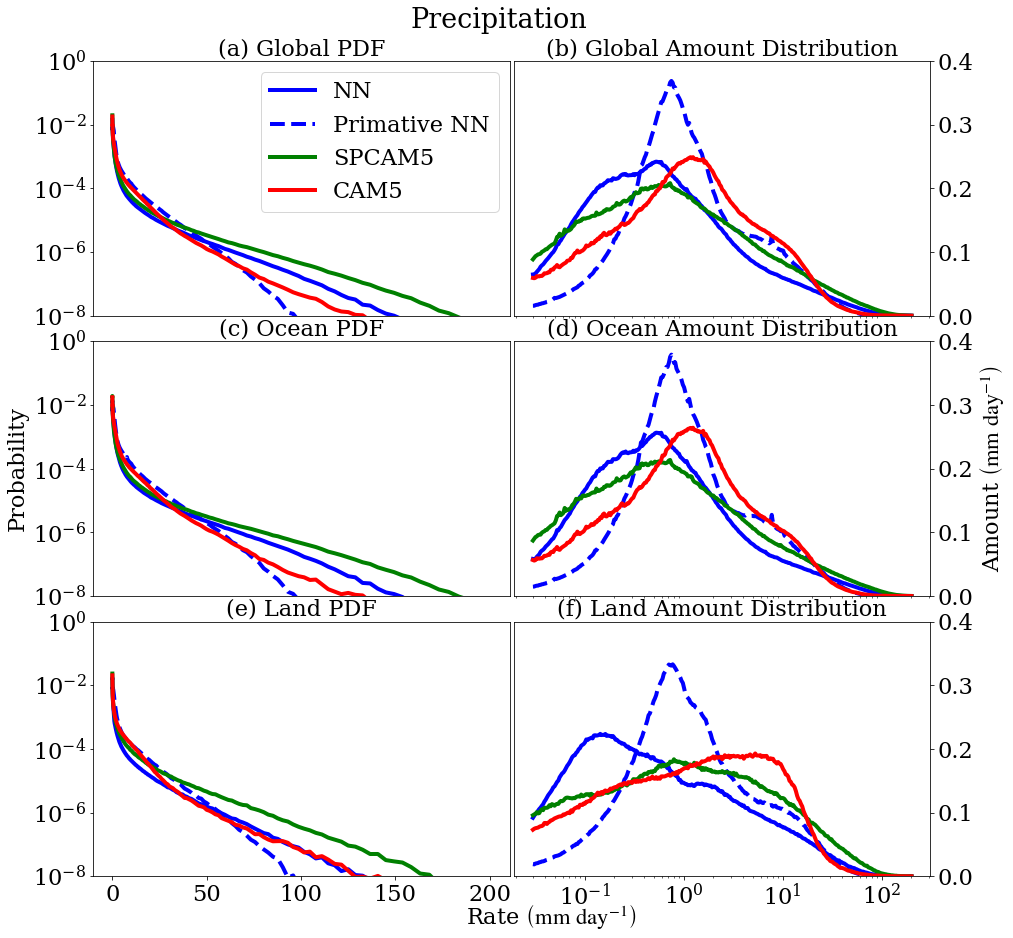

In [111]:
bins = array_generator(0.03, maxi, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(feat, bins=bins, range=(0, maxi))
freq, edges = np.histogram(feat, bins = shared_bins, density=True)
bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(targ, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(cams, bins = shared_bins, density=True)

ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges[:-1], freq/np.sum(freq),  label = "NN", color = 'blue')
ax[0,0].plot(bad_edges[:-1], bad_freq/np.sum(bad_freq),  label = "Primative NN", color = 'blue', linestyle="--")
ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5", color = 'green')
ax[0,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams), label = "CAM5", color = 'red')
ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
bad_totals = bad_freq*bad_edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
    
ax[0,1].plot(edges[:-1], totals,  label = "DNN", color = 'blue')
ax[0,1].plot(bad_edges[:-1], bad_totals,  label = "Primative DNN", color = 'blue', linestyle="--")
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5", color = 'green')
ax[0,1].plot(edges_cams[:-1], totals_cam, label = "CAM5", color = 'red')

ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(loc = 'best')

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.4)

shared_bins = np.histogram_bin_edges(ocean_feat, bins=bins, range=(0, maxi))
freq, edges = np.histogram(ocean_feat, bins = shared_bins, density=True)
bad_freq, bad_edges = np.histogram(bad_ocean_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(ocean_targ, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(ocean_cams, bins = shared_bins, density=True)

ax[1,0].plot(edges[:-1], freq/np.sum(freq), color = 'blue')
ax[1,0].plot(bad_edges[:-1], bad_freq/np.sum(bad_freq), color = 'blue', linestyle="--")
ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams),  color = 'red')
ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
bad_totals = bad_freq*bad_edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]

ax[1,1].plot(edges[:-1], totals, color = 'blue')
ax[1,1].plot(bad_edges[:-1], bad_totals, color = 'blue', linestyle="--")
ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_cams[:-1], totals_cam, color = 'red')
ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.4)

shared_bins = np.histogram_bin_edges(land_feat, bins=bins, range=(0, maxi))
freq, edges = np.histogram(land_feat, bins = shared_bins, density=True)
bad_freq, bad_edges = np.histogram(bad_land_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(land_targ, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(land_cams, bins = shared_bins, density=True)

ax[2,0].plot(edges[:-1], freq/np.sum(freq), color = 'blue')
ax[2,0].plot(bad_edges[:-1], bad_freq/np.sum(bad_freq), color = 'blue', linestyle="--")
ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_cams[:-1], freq_cams/np.sum(freq_cams),  color = 'red')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
bad_totals = bad_freq*bad_edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]

ax[2,1].plot(edges[:-1], totals, color = 'blue')
ax[2,1].plot(bad_edges[:-1], bad_totals, color = 'blue', linestyle="--")
ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_cams[:-1], totals_cam, color = 'red')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.4)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)
plt.savefig("Figure9.png")
plt.savefig("Figure9.pdf")

In [112]:
jordan_data = pd.read_csv('Compressed_Data/results.csv', sep = ',')

In [113]:
def get_results(version=''):
    #result_dir = 'SherpaResults/land_data_random{}/normal_mse/'.format(version)
    result_dir = '/fast/gmooers/RG_Paper_Data/Jordan_Ott/'

    history_dir = result_dir + 'Models/'
    result_file = result_dir + 'results{}.csv'.format(version)

    df = pd.read_csv(result_file)

    df = df[df['Status'] != 'COMPLETED'].reset_index()

    bad_trials = df[(df['val_loss'] > 0.005) | (df['loss'] > 0.005)]['Trial-ID'].unique()
    df = df[~df['Trial-ID'].isin(bad_trials)].reset_index()
    return df

def combine_dfs(first='',second='2'):
    df1 = get_results(first)
    df2 = get_results(second)
    
    if df1['val_loss'].min() > df2['val_loss'].min():
        print ('Best loss:', df2['val_loss'].min(),'from run 2, trial:', df2.iloc[df2['val_loss'].idxmin()]['Trial-ID'])
    else:
        print ('Best loss:', df1['val_loss'].min(),'from run 1, trial:', df1.iloc[df1['val_loss'].idxmin()]['Trial-ID'])
        
    df2['Trial-ID'] = df1['Trial-ID'].max() + df2['Trial-ID']
    
    print (df2['Trial-ID'].max(), 'models tried...')
    df = df1.append(df2, ignore_index=True)

    return df

In [114]:
baseline = {'val_loss': [0.0027699412128464975, 0.0027675854094271883, 0.002750806139965779, 0.0027184670896490343, 0.002697938473128253, 0.0027200228956737404, 0.002697579861752714, 0.0027041057355993194, 0.0027361180229907287, 0.0027223027184516144, 0.0027174908288899085, 0.002705075166346688, 0.0026945003744093007, 0.002688072946386839, 0.002714479107119437, 0.0027216500134899803, 0.002692673348817968, 0.0027151860584786465, 0.002717053027243123, 0.002696788561289504, 0.0027047853027976796, 0.0027102316666424995, 0.002679989631039186, 0.002674067506729597, 0.0026703028731369], 'loss': [0.0029240883347595847, 0.0027942983982693985, 0.002765629174030718, 0.0027506531794350467, 0.00273707072116032, 0.002728933417163408, 0.0027222536753665214, 0.0027198918636816075, 0.0027193166255475736, 0.0027167066369639882, 0.0027142092041242604, 0.0027110217051854353, 0.0027093022819072265, 0.002706057847611977, 0.0027044928225834425, 0.0027045464933883557, 0.002703787513724742, 0.0027013152791427967, 0.002699959184807386, 0.0026990613309396693, 0.0026981373776758678, 0.0026971993964014012, 0.002695570826957943, 0.002693741966372858, 0.0026922912526016704], 'Iteration':range(25)}
baseline = pd.DataFrame(baseline)

df = combine_dfs()
best_trial = df.iloc[df['val_loss'].idxmin()]['Trial-ID']
best_df = df[df['Trial-ID'] == best_trial]

Best loss: 0.002393034852266267 from run 2, trial: 22
218 models tried...


In [115]:
second_df = combine_dfs('3','4')
best_second_trial = second_df.iloc[second_df['val_loss'].idxmin()]['Trial-ID']
best_second_df = second_df[second_df['Trial-ID'] == best_second_trial]

Best loss: 0.00232526399379592 from run 2, trial: 4
46 models tried...


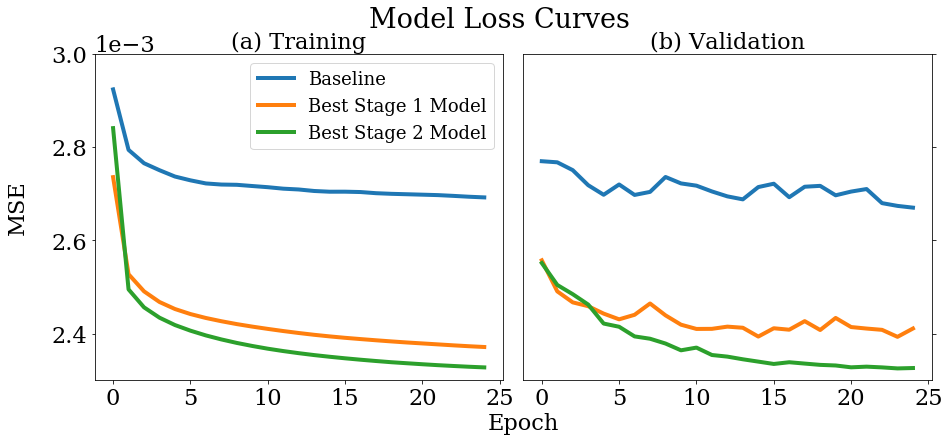

In [116]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(np.arange(0, len(baseline["loss"]), 1), baseline["loss"], label = "Baseline")
ax[0].plot(np.arange(0, len(best_df["loss"]), 1), best_df["loss"], label = "Best Stage 1 Model")
ax[0].plot(np.arange(0, len(best_second_df["loss"]), 1), best_second_df["loss"], label = "Best Stage 2 Model")

ax[0].set_title("(a) Training", fontsize = fz)
ax[0].set_ylabel("MSE")
ax[0].yaxis.set_label_coords(-0.16,0.53)
ax[0].set_xlabel("Epoch")
ax[0].xaxis.set_label_coords(1.05,-0.10)
#ax[0].set_yscale("log")
ax[0].legend(prop={'size': fz*0.8})
ax[0].set_ylim(2.3e-3, 3.0e-3)
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1].plot(np.arange(0, len(baseline["val_loss"]), 1), baseline["val_loss"], label = "Baseline")
ax[1].plot(np.arange(0, len(best_df["val_loss"]), 1), best_df["val_loss"], label = "Best Stage 1 Model")
ax[1].plot(np.arange(0, len(best_second_df["val_loss"]), 1), best_second_df["val_loss"], label = "Best Stage 2 Model")

ax[1].set_title("(b) Validation", fontsize = fz)
#ax[1].set_yscale("log")

ax[1].yaxis.set_major_formatter(NullFormatter())
ax[1].yaxis.set_minor_formatter(NullFormatter())
ax[1].yaxis.tick_right()
ax[1].set_ylim(2.3e-3, 3.0e-3)
#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle("Model Loss Curves", y=0.99)
plt.subplots_adjust(wspace=0.05)

plt.savefig("Figures/Figure11.png")
plt.savefig("Figures/Figure11.pdf")

In [117]:
SSE_SHERPA_SPCAM5_heat_daily = np.load("Compressed_Data/SSE_Daily_Interval_Heat.npy")
SSE_SHERPA_SPCAM5_moisture_daily = np.load("Compressed_Data/SSE_Daily_Interval_Moisture.npy")

SVAR_SHERPA_SPCAM5_heat_daily = np.load("Compressed_Data/SVAR_Daily_Interval_Heat.npy")
SVAR_SHERPA_SPCAM5_moisture_daily = np.load("Compressed_Data/SVAR_Daily_Interval_Moisture.npy")

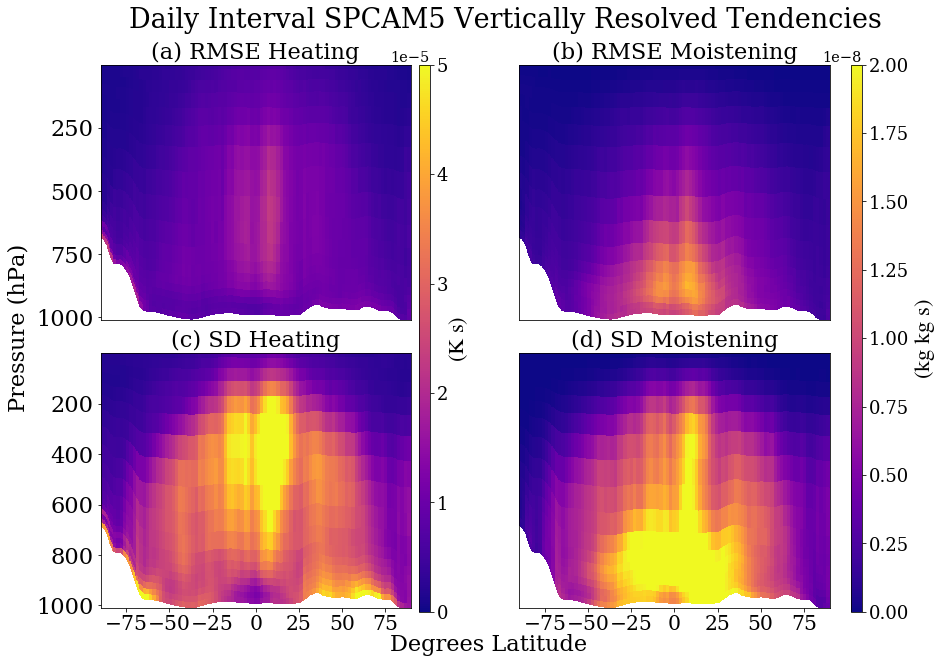

In [118]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

cp = ax[0,0].pcolor(SPCAM5_Xs, SPCAM5_pband, np.nanmean((SSE_SHERPA_SPCAM5_heat_daily/31.0)**0.5, axis = 0), cmap = 'plasma', vmin=0, vmax=0.5e-4)
ax[0,0].set_title("(a) RMSE Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

cp = ax[0,1].pcolor(SPCAM5_Xs, SPCAM5_pband, np.nanmean((SSE_SHERPA_SPCAM5_moisture_daily/31.0)**0.5, axis = 0), cmap = 'plasma', vmin=0, vmax=0.2e-7)
ax[0,1].set_title("(b) RMSE Moistening", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.58,-0.03)

cp = ax[1,0].pcolor(SPCAM5_Xs, SPCAM5_pband, np.nanmean((SVAR_SHERPA_SPCAM5_heat_daily/(31.0-1.0))**0.5, axis=0), cmap = 'plasma', vmin=0, vmax=0.5e-4)
ax[1,0].set_title("(c) SD Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
#ax[1,0].set_xticks([])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)

cbar_ax = fig.add_axes([0.42, 0.12, 0.01, 0.76])
cbar = fig.colorbar(cp, cax=cbar_ax)
cbar.set_label(label=r'$\left(\mathrm{K} \ \mathrm{s}\right)$', labelpad=-1.5)
cbar.ax.tick_params(labelsize=fz*0.8)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)

cp = ax[1,1].pcolor(SPCAM5_Xs, SPCAM5_pband, np.nanmean((SVAR_SHERPA_SPCAM5_moisture_daily/(31.0-1.0))**0.5, axis=0), cmap = 'plasma', vmin=0, vmax=0.2e-7)
ax[1,1].set_title("(d) SD Moistening", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
#ax[1,1].set_xticks([])
ax[1,1].set_xlabel("Degrees Latitude")
ax[1,1].xaxis.set_label_coords(-0.10,-0.1)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.01, 0.76])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

plt.suptitle("Daily Interval SPCAM5 Vertically Resolved Tendencies", y = 0.96)
plt.subplots_adjust(hspace=0.13, wspace=0.35)
print(" ")

plt.savefig("Figures/Figure12.png")
plt.savefig("Figures/Figure12.pdf")

In [119]:
T = np.load("Compressed_Data/X_vals.npy")
Z = np.load("Compressed_Data/Z_vals.npy")
anon_ocean_heat_SPCAM5_composite = np.load("Compressed_Data/anon_ocean_heat_SPCAM5_composite.npy")
anon_ocean_heat_DNN_composite = np.load("Compressed_Data/anon_ocean_heat_DNN_composite.npy")
anon_land_heat_SPCAM5_composite = np.load("Compressed_Data/anon_land_heat_SPCAM5_composite.npy")
anon_land_heat_DNN_composite = np.load("Compressed_Data/anon_land_heat_DNN_composite.npy")
anon_ocean_moist_SPCAM5_composite = np.load("Compressed_Data/anon_ocean_moist_SPCAM5_composite.npy")
anon_ocean_moist_DNN_composite = np.load("Compressed_Data/anon_ocean_moist_DNN_composite.npy")
anon_land_moist_SPCAM5_composite = np.load("Compressed_Data/anon_land_moist_SPCAM5_composite.npy")
anon_land_moist_DNN_composite = np.load("Compressed_Data/anon_land_moist_DNN_composite.npy")

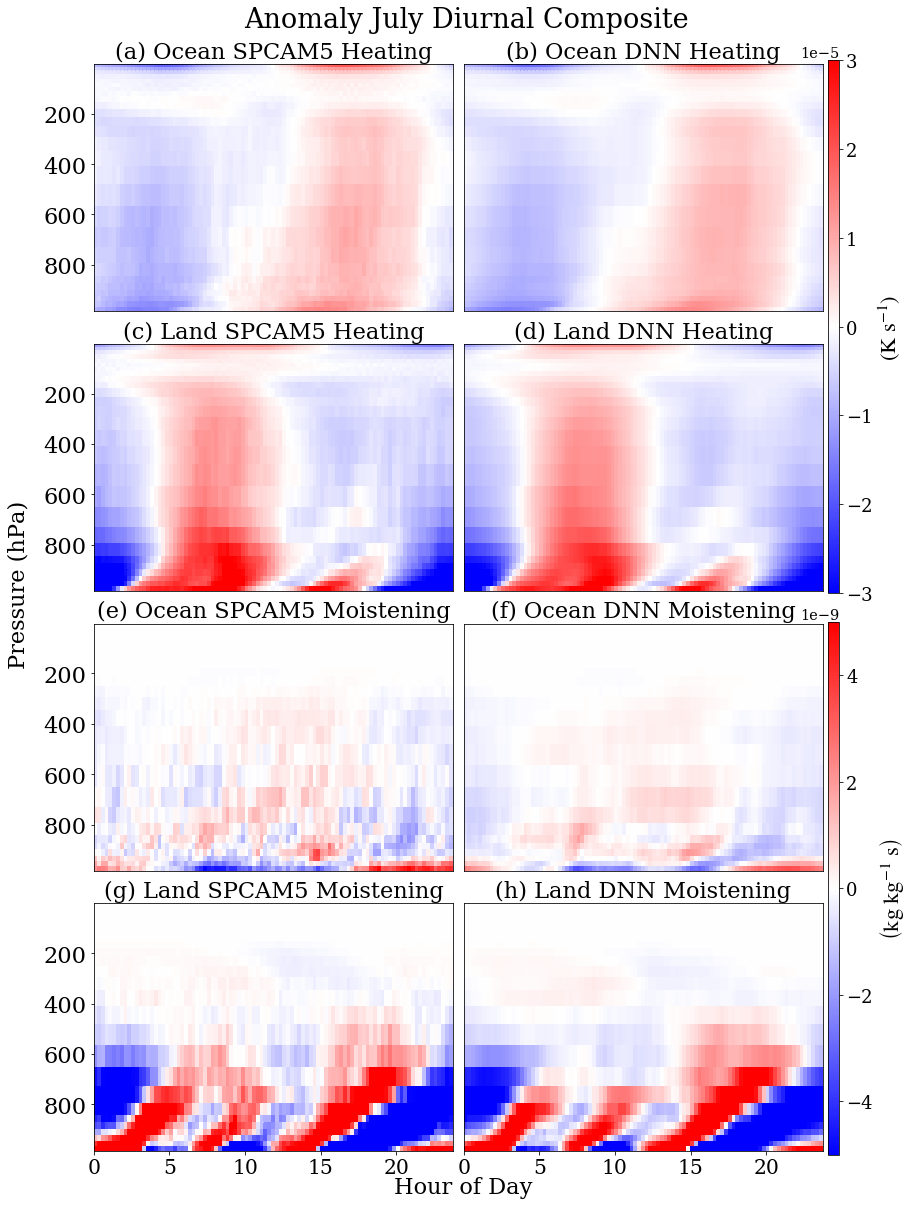

In [120]:
fig, ax = plt.subplots(4,2, figsize=(15,20))

cp = ax[0,0].pcolor(T, Z, anon_ocean_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -3.0e-5, vmax=3.0e-5)
ax[0,0].set_title("(a) Ocean SPCAM5 Heating", fontsize = fz)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].locator_params(nbins=8)
ax[0,0].tick_params(axis='x', labelsize=fz*0.9)
ax[0,0].set_xticks([])

cp = ax[0,1].pcolor(T, Z, anon_ocean_heat_DNN_composite.T, cmap = 'bwr', vmin =  -3.0e-5, vmax=3.0e-5)
ax[0,1].set_title("(b) Ocean DNN Heating", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])
ax[0,1].set_ylabel("Pressure (hPa)")
ax[0,1].yaxis.set_label_coords(-1.21,-1.1)
ax[0,1].locator_params(nbins=8)
ax[0,1].tick_params(axis='x', labelsize=fz*0.9)

cp = ax[1,0].pcolor(T, Z, anon_land_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -3.0e-5, vmax=3.0e-5)
ax[1,0].set_title("(c) Land SPCAM5 Heating", fontsize = fz)
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].set_xticks([])

cp = ax[1,1].pcolor(T, Z, anon_land_heat_DNN_composite.T, cmap = 'bwr', vmin = -3.0e-5, vmax=3.0e-5)
ax[1,1].set_title("(d) Land DNN Heating", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.001,-0.10)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.5125, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{K} \ \mathrm{s^{-1}}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)


cp = ax[2,0].pcolor(T, Z, anon_ocean_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-0.5e-8, vmax=0.5e-8)
ax[2,0].set_title("(e) Ocean SPCAM5 Moistening", fontsize = fz)
ax[2,0].set_ylim(ax[2,0].get_ylim()[::-1])
ax[2,0].locator_params(nbins=8)
ax[2,0].tick_params(axis='x', labelsize=fz*0.9)
ax[2,0].set_xticks([])

cp = ax[2,1].pcolor(T, Z, anon_ocean_moist_DNN_composite.T, cmap = 'bwr', vmin=-0.5e-8, vmax=0.5e-8)
ax[2,1].set_title("(f) Ocean DNN Moistening", fontsize = fz)
ax[2,1].set_ylim(ax[2,1].get_ylim()[::-1])
ax[2,1].set_yticks([])
ax[2,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[2,1].locator_params(nbins=8)
ax[2,1].tick_params(axis='x', labelsize=fz*0.9)

cp = ax[3,0].pcolor(T, Z, anon_land_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-0.5e-8, vmax=0.5e-8)
ax[3,0].set_title("(g) Land SPCAM5 Moistening", fontsize = fz)
ax[3,0].locator_params(nbins=8)
ax[3,0].tick_params(axis='x', labelsize=fz*0.9)
ax[3,0].set_ylim(ax[3,0].get_ylim()[::-1])

cp = ax[3,1].pcolor(T, Z, anon_land_moist_DNN_composite.T, cmap = 'bwr', vmin=-0.5e-8, vmax=0.5e-8)
ax[3,1].set_title("(h) Land DNN Moistening", fontsize = fz)
ax[3,1].set_ylim(ax[3,1].get_ylim()[::-1])
ax[3,1].set_yticks([])
ax[3,1].set_xlabel("Hour of Day")
ax[3,1].xaxis.set_label_coords(-0.001,-0.10)
ax[3,1].locator_params(nbins=8)
ax[3,1].tick_params(axis='x', labelsize=fz*0.9)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.1225, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg^{-1}} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)



plt.suptitle("Anomaly July Diurnal Composite", y = 0.92, x=0.47)
plt.subplots_adjust(hspace=0.13, wspace=0.03)
plt.savefig("Figures/Figure13.png")
plt.savefig("Figures/Figure13.pdf")